##  Whisky - Distillery Clustering

### 1.1 Reading Files 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Reading Input Files
whisky =pd.read_csv("whisky.txt")
whisky['region'] =pd.read_csv("regions.txt")
print(whisky.columns)
print(whisky.shape)
whisky.iloc[:10,:]


Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'region'],
      dtype='object')
(86, 18)


,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [ ]:
whisky.describe(include= 'all')

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
count,86.000000,86,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86,86.000000,8.600000e+01,86
unique,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN,NaN,6
top,NaN,Aberfeldy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IV30 3SS,NaN,NaN,Speyside
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,43
mean,43.500000,NaN,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,NaN,287247.162791,8.026597e+05,NaN
std,24.969982,NaN,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,NaN,67889.046814,8.802422e+04,NaN
min,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,126680.000000,5.542600e+05,NaN
25%,22.250000,NaN,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,265672.500000,7.556975e+05,NaN
50%,43.500000,NaN,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,NaN,319515.000000,8.398850e+05,NaN
75%,64.750000,NaN,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,NaN,328630.000000,8.507700e+05,NaN


### 1.2 EDA 

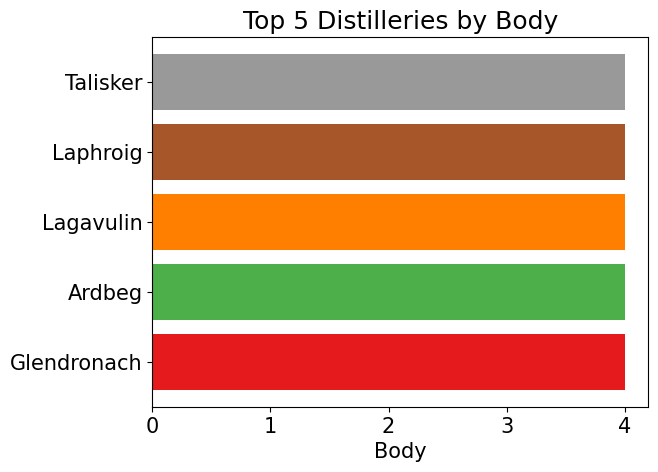

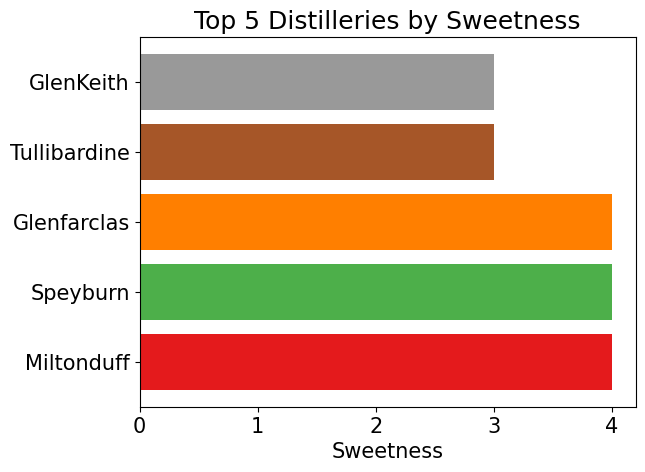

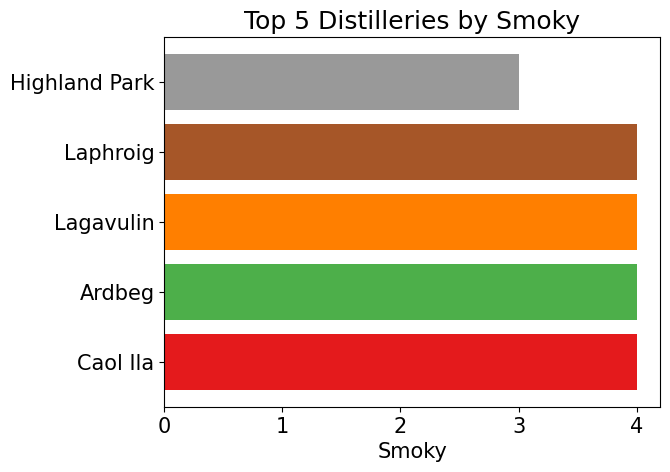

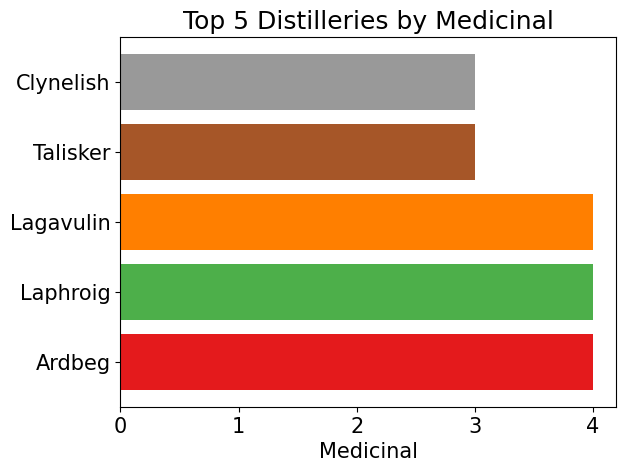

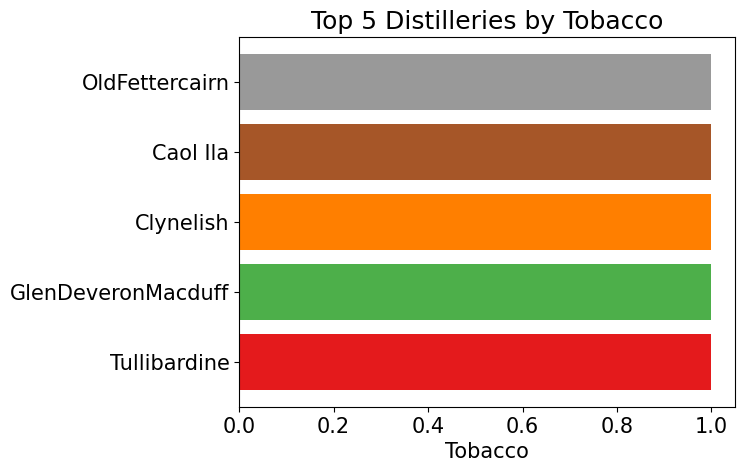

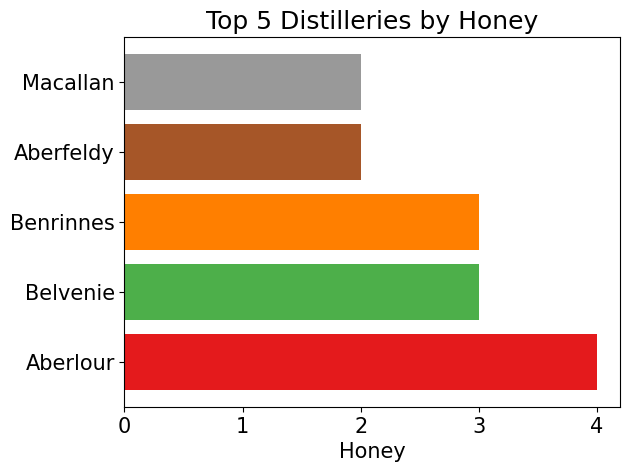

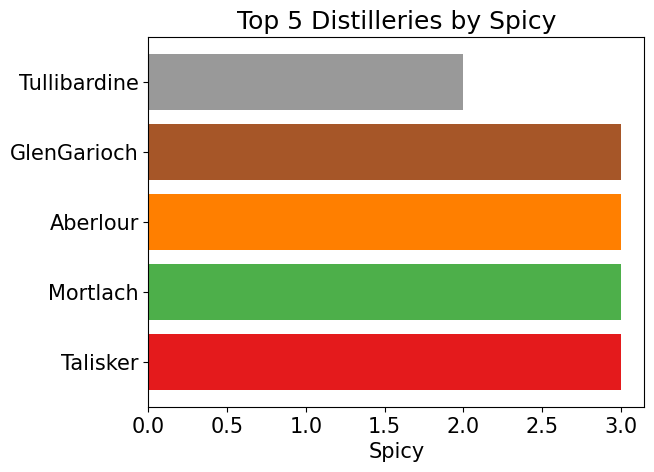

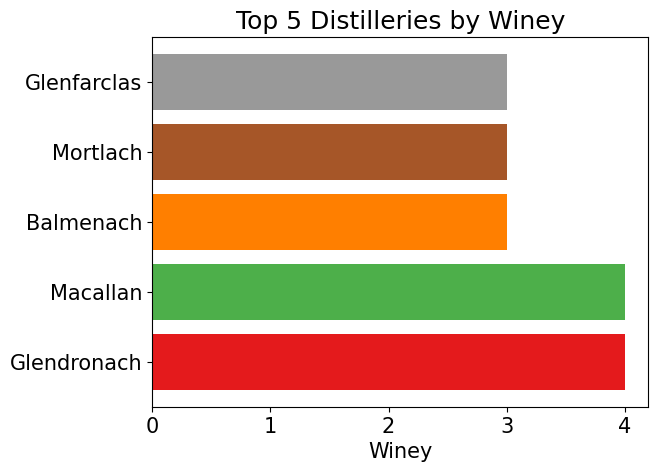

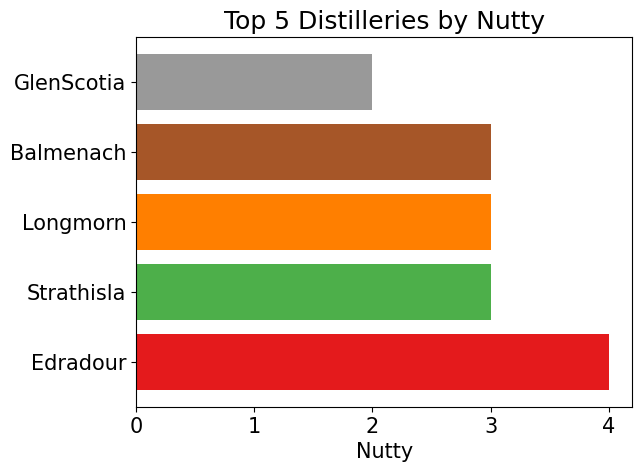

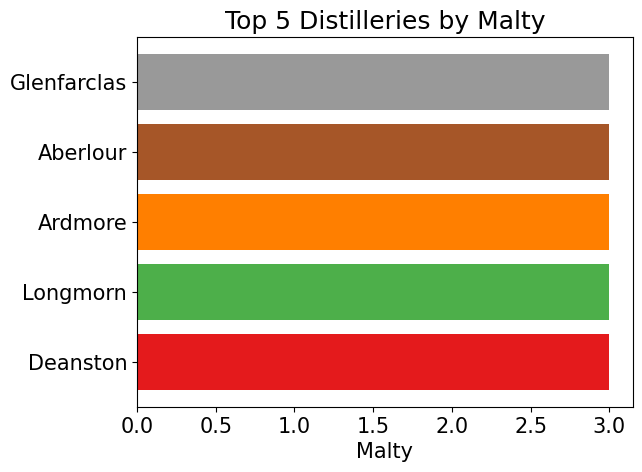

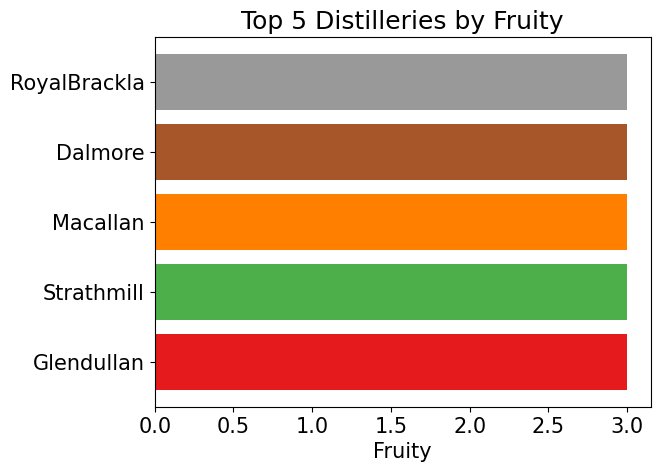

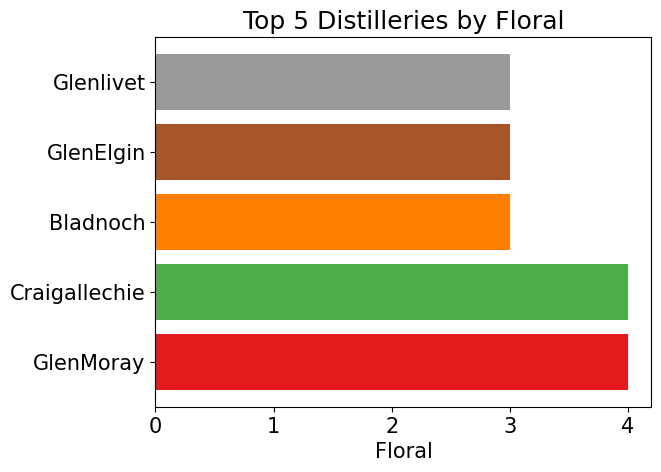

In [ ]:
def plot_top_n_distilleries(column_name, n,df):
    # sort the dataframe by the column in descending order and select the top n rows
    top_n = df.sort_values(by=column_name, ascending=False).head(n)
    # create a horizontal bar chart with the distillery names on the y-axis and the column values on the x-axis, with colors
    colors = plt.cm.Set1(np.linspace(0, 1, n))
    plt.barh(top_n['Distillery'], top_n[column_name], color=colors)
    plt.xlabel(column_name)
    plt.title(f'Top {n} Distilleries by {column_name}')
    plt.savefig(f'Top {n} Distilleries by {column_name}')
    plt.show()

flavour = whisky.iloc[:,2:-4]
n = 5   # top n distilleries 
df = whisky # dataframe name 
for i in range(len(list(flavour))):
    plot_top_n_distilleries(list(flavour)[i],n,df)



###  1.3 Correlation - Heat Maps

#### Correlation between whiskey flavours 

   Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0     2          2      2          0        0      2      1      2      2   
1     3          3      1          0        0      4      3      2      2   
2     1          3      2          0        0      2      0      0      2   
3     4          1      4          4        0      0      2      0      1   
4     2          2      2          0        0      1      1      1      2   

   Malty  Fruity  Floral  
0      2       2       2  
1      3       3       2  
2      2       3       2  
3      2       1       0  
4      3       1       1  


<ipython-input-257-e62049fe1178>:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



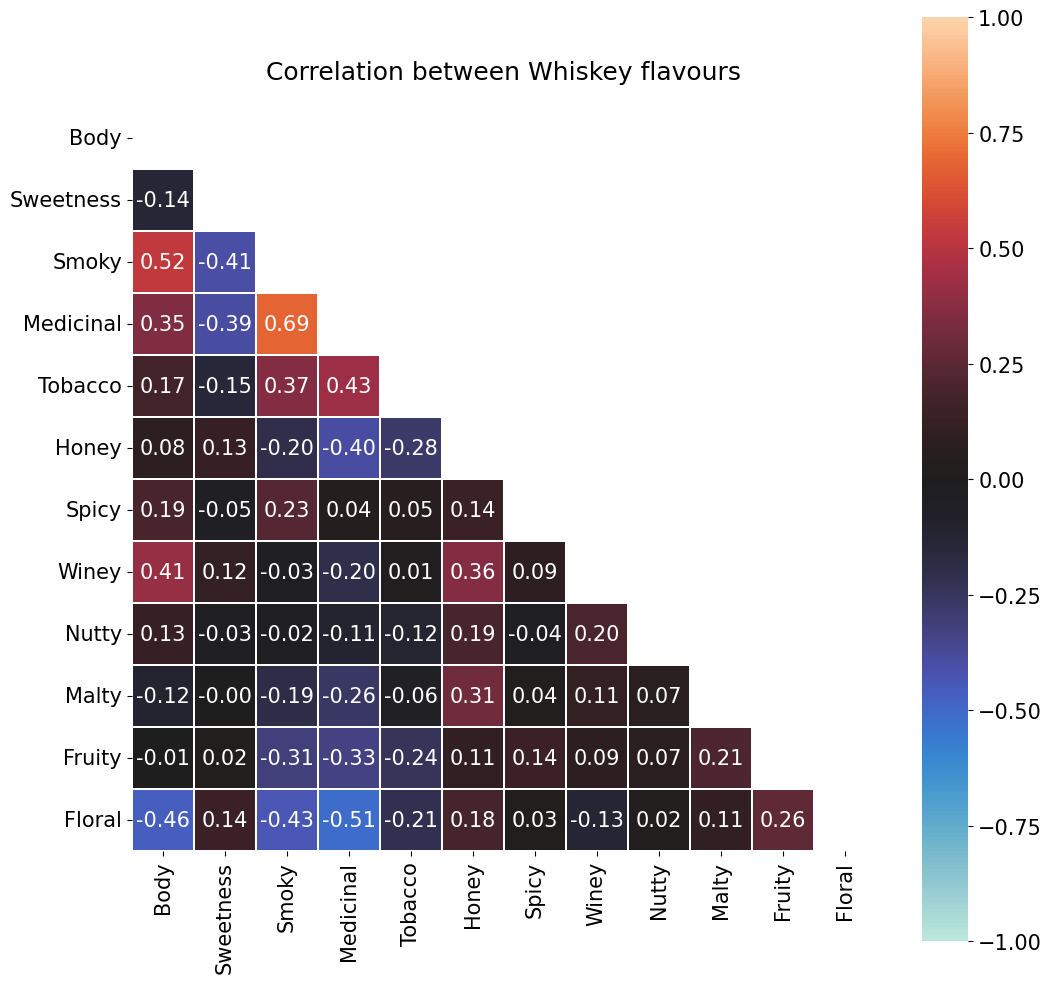

In [ ]:
flavour = whisky.iloc[:,2:-5]
print(flavour.head())
corr_flavour = pd.DataFrame.corr(flavour)


mask = np.zeros_like(corr_flavour, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr_flavour, 
    vmin=-1, vmax=1,  
    center=0,
    annot=True,
    square=True,
    fmt='.2f',
    linewidth =0.1,
    mask =mask
)
plt.title('Correlation between Whiskey flavours',pad =20)
plt.savefig('Whiskey Flavour corrmap.pdf')
plt.show()

#### Correlation between whiskey distillaries  

In [ ]:
len(whisky['Distillery'].unique())

86

<ipython-input-259-d2549e85b1ae>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



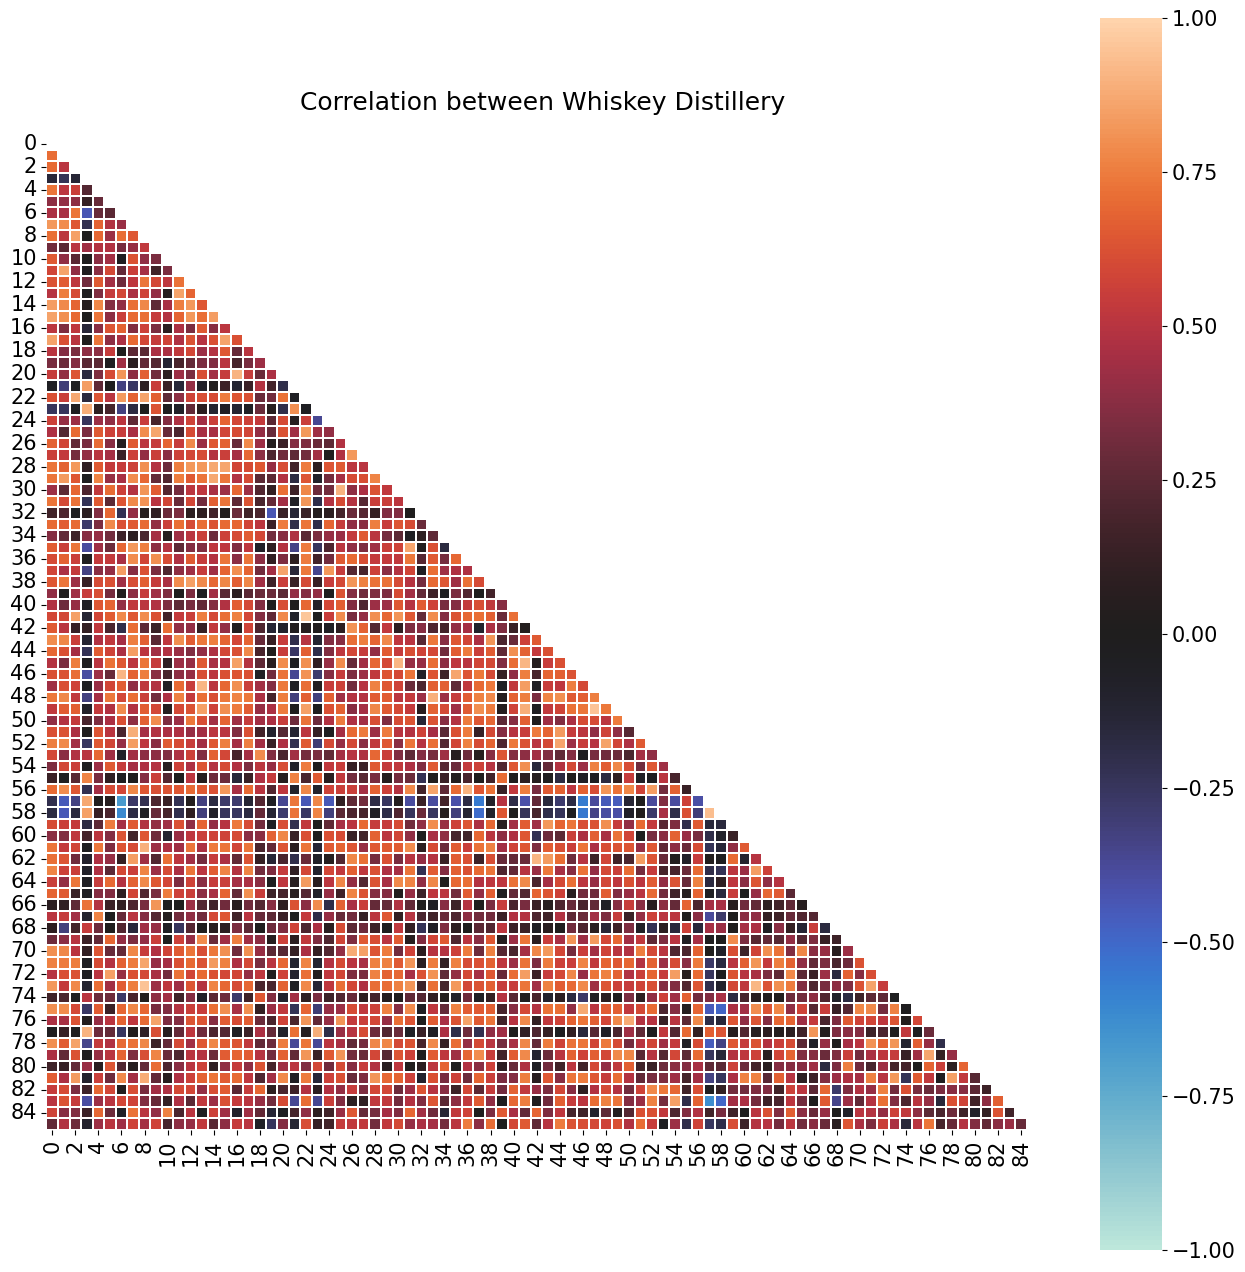

In [ ]:
corr_whiskey = pd.DataFrame.corr(flavour.transpose())
#correlation plot between whiskey distilleries' 
mask = np.zeros_like(corr_whiskey, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    corr_whiskey, 
    vmin=-1, vmax=1,  
    center=0,
    annot=False,
    square=True,
    fmt='.2f',
    linewidth =0.1,
    mask =mask
    
)
plt.title('Correlation between Whiskey Distillery',pad =20)
plt.savefig('Whiskey Distillery corrmap.pdf')
plt.show()

## MODEL BUILDING

### Importing Libraries

In [ ]:
## Importing Libraries

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

## K Means Clustering

In [ ]:
X = flavour   #whisky flavours/ features to be used for clustering 
y = whisky['Distillery']   #entities to be clustered

####  Finding the optimum number of clusters - using elbow method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

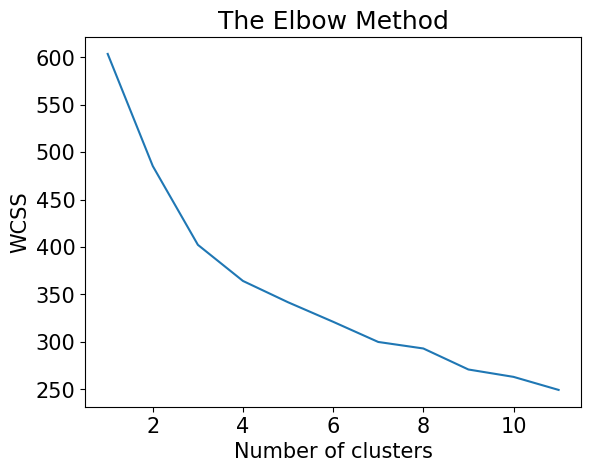

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####  K means algo

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 7) 
whisky['Class'] = kmeans.fit_predict(X)  # predicting entities in corresponding clusters.
whisky['Class'].values 
whisky.head(5)  

# to see get the centroid of clusters 
centroid = kmeans.cluster_centers_
centroid.shape


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(2, 11)

### 2D Plotting of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



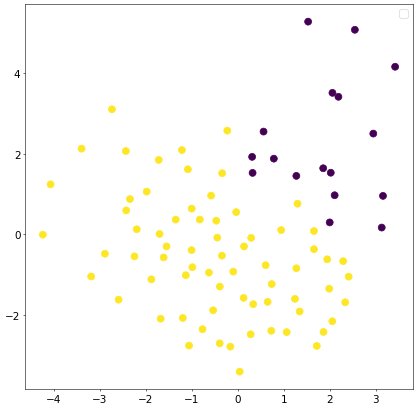

In [ ]:
from sklearn.manifold import MDS
plt.figure(figsize=(10, 10), dpi=50)
plt.rcParams["font.size"] = 15


col =['orange','green', 'blue', 'purple', 'red']
chars = "^<>vo+d"
labels=y

model = MDS(n_components=2, dissimilarity="euclidean", random_state=0)
out = model.fit_transform(X)
plt.scatter(out[:, 0], out[:, 1], c=kmeans.labels_,s=100,cmap='viridis')
plt.legend(loc='upper right')
plt.savefig('Distillery Clusters.pdf')
plt.show()

In [ ]:
#finding similar distillaries
t= whisky.groupby('Class')['Distillery'].unique()

col =['orange','green', 'blue', 'purple', 'red']
chars = "^<>vo"


# making a list of similar disillaries
Cluster =[]
for i in range(len(t)):
  Clusters=[]
  Clusters.extend([ i ,str(t[i]),len(t[i]),col[i],chars[i]])
  Cluster.append(Clusters)
Cluster

#creating a dataframe of the cluster, distillaries, and count
Cluster = pd.DataFrame(Cluster,columns =['Cluster','Distilleries','Count','Colour','Marker'])
Cluster

,Cluster,Distilleries,Count,Colour,Marker
0,0,['Ardbeg' 'Balblair' 'Bowmore' 'Bruichladdich'...,17,orange,^
1,1,['Aberfeldy' 'Aberlour' 'AnCnoc' 'Ardmore' 'Ar...,69,green,<


### Cluster Properties - Flavour

In [ ]:
 x = list(whisky[whisky['Class'] == 0].iloc[:,2:-5].mean())
 x

<ipython-input-388-6a7afcb69231>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



[2.5294117647058822,
 1.6470588235294117,
 2.764705882352941,
 2.1176470588235294,
 0.29411764705882354,
 0.6470588235294118,
 1.6470588235294117,
 0.5882352941176471,
 1.3529411764705883,
 1.411764705882353,
 1.3529411764705883,
 0.9411764705882353]

In [ ]:
import plotly.graph_objects as go

categories = list(whisky.columns[2:-5])

fig = go.Figure()

r1 =list(whisky[whisky['Class'] == 0].iloc[:,2:-5].mean())
for i in range(len(r1)):
  r1[i] = round(r1[i],1)



fig.add_trace(go.Scatterpolar(
      r=r1,
      theta=categories,
      fill='toself',
      name='Class 1'
))


fig.add_trace(go.Scatterpolar(
      r=list(whisky[whisky['Class'] == 1].iloc[:,2:-5].mean()),
      theta=categories,
      fill='toself',
      name='Class 2'
))




fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True
)
plt.savefig('Distillery Cluster Flavour profile.pdf')
fig.show()

<ipython-input-393-0173a17f2f42>:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-393-0173a17f2f42>:22: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<Figure size 640x480 with 0 Axes>

### Distillery Recommendation Systems 

In [ ]:
mean=[]
for i in range(len(whisky)):
  mean.append(round(whisky.iloc[i,2:-6].mean(),2))
whisky['Flavour_mean']= mean

In [ ]:
distillery = 'Ardmore'
def similar_distillery(distillery,n):
  cluster_no = whisky[whisky['Distillery'] == distillery]['Class']
  print(f"Cluster Number is {cluster_no[0]}")
  recommendation = whisky[whisky['Class'] == cluster_no[0]].sort_values(by ='Flavour_mean',ascending=False)['Distillery'].head(n)
  return recommendation
  

In [ ]:
similar_distillery('Aberfeldy',7)

Cluster Number is 1


1        Aberlour
62       Macallan
75     Strathisla
44    Glenfarclas
65       Mortlach
42    Glendronach
10      Balmenach
Name: Distillery, dtype: object

In [ ]:
whisky['Distillery']

0        Aberfeldy
1         Aberlour
2           AnCnoc
3           Ardbeg
4          Ardmore
          ...     
81       Tobermory
82         Tomatin
83       Tomintoul
84         Tormore
85    Tullibardine
Name: Distillery, Length: 86, dtype: object

### Metric

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score (whisky.iloc[:,2:-6], kmeans.labels_,metric='euclidean')

print("Score = ", score)

Score =  0.23673250551129946
